## Portfolio
1. Import data from yahoo finance and inspect
- Normalize close price and plot.
- Generate Box plots.
2. Portfolio Optimization
- Generate portfolio with the specific allocations.
- Calculate the mean, std deviation, and cumulative daily return and plot the histogram. Also, calculate the annual Sharpe ratio.
- Review correlations.
- Markowitz optimization.
- Markowitz Portfolio Optimization: Using the Monte Carlo approach (generate a large number of guesses and check) to determine the optimal allocation.
- Plot results

***

### 1. Import data from yahoo finance and inspect

In [1]:
from yfstockdata import YFStockData
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

import numpy as np 

stock_symbols = ["SPY", "QQQ", "MSFT", "GOOGL", "META", "NVDA", "LLY", "XLV", "XLU", "GDX"]  # Add your list of stock symbols
start_date = "2023-01-01"
end_date = "2023-12-31"

stock_data = YFStockData(stock_symbols)
stock_data.fetch_data(start_date, end_date)

- Normalize Close price and plot.

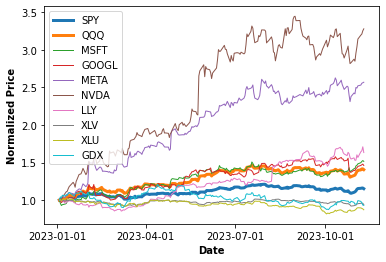

In [2]:
df=pd.DataFrame()

for symbol in stock_symbols:
    data = stock_data.get_stock_data(symbol)
    df=pd.concat([df,data.Close], axis=1)

    if symbol=="SPY" or symbol=="QQQ":
        lw=3
    else:
        lw=1
    plt.plot(data.Close/data.Close[0], label=symbol,lw=lw)
df.columns=stock_symbols

# Customize the x-axis date intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # Format of the date labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set the interval between labels (1 day in this example)


plt.legend()

plt.ylabel("Normalized Price", fontweight='bold')
plt.xlabel("Date", fontweight='bold')
plt.show()

- Generate Box plot of daily LogReturn

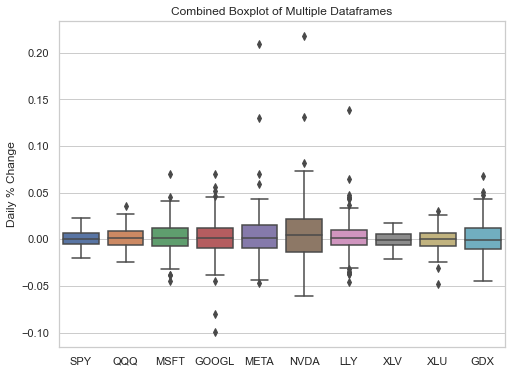

In [3]:
#generate box plot

df_LogReturn=pd.DataFrame()
for symbol in stock_symbols:
    _data = stock_data.get_stock_data(symbol)
    df_LogReturn=pd.concat([df_LogReturn, _data.Log_Return], axis=1, ignore_index=True)

df_LogReturn.columns=stock_symbols
sns.set(style="whitegrid")  # Set the style for the plot

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_LogReturn)

# Add labels and title
plt.ylabel("Daily % Change")
plt.title("Combined Boxplot of Multiple Dataframes")

plt.show()

### 2. Portfolio Optimization
- Generate portfolio with the specific allocations.
    - Note that the combined portfolio beats the SPY and QQQ indices

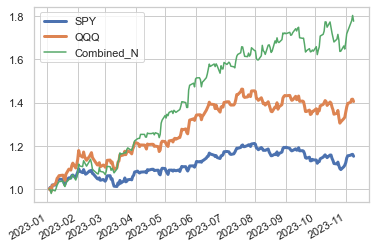

In [4]:
port_symbols=["META", "NVDA", "LLY", "MSFT", "XLV", "XLU", "GDX"]
port_allocation=len(port_symbols)*[1/len(port_symbols)]

df_port=stock_data.portfolio_allocation(port_symbols, port_allocation)

#plot indices
for symbol in stock_symbols:
    _data = stock_data.get_stock_data(symbol)

    if symbol=="SPY" or symbol=="QQQ":
        plt.plot(_data.Close/_data.Close[0], label=symbol, lw=3)

#combined the normalized portfolio performance w.r.t indices
df_port.Combined_N.plot()
plt.legend()
plt.show()

- Calculate the mean, std deviation, and cumulative daily return and plot the histogram. Also, calculate the annual Sharpe ratio.

The mean of daily return: 0.277%
The standard deviation of daily return: 1.333%

The mean of log daily return: 0.267%
The standard deviation of log daily return: 1.326%

The cumulative return from 01-03-2023 to 11-09-2023: 77.703%
The annualized Sharpe ratio for 0% risk free rate is: 3.293


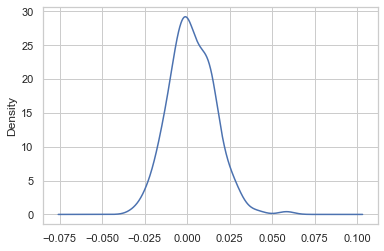

In [5]:

#Note: Daily return is arithmetic and log return is geometric. Log return is more representative of the stock price fluctuation. 

print("The mean of daily return: %s%%" %round(100*df_port["Daily_Return"].mean(), 3))
print("The standard deviation of daily return: %s%%" %round(100*df_port["Daily_Return"].std(), 3))
print("")
print("The mean of log daily return: %s%%" %round(100*df_port["Log_Return"].mean(), 3))
print("The standard deviation of log daily return: %s%%" %round(100*df_port["Log_Return"].std(), 3))
print("")
print("The cumulative return from %s to %s: %s%%" %(df_port.index[0].strftime('%m-%d-%Y'),df_port.index[-1].strftime('%m-%d-%Y'),round(100*(df_port["Combined"][-1]/df_port["Combined"][0]-1), 3)))

#calculate the annualized Sharpe Ratio (SR)
#risk free rate
RFR=0
ASR=(252**0.5)*(df_port["Daily_Return"].mean()-RFR)/df_port["Daily_Return"].std()

print("The annualized Sharpe ratio for %s%% risk free rate is: %s" %(100*RFR, round(ASR,3)))

df_port["Daily_Return"].plot(kind="kde")
plt.show()

- Review correlations.

In [6]:
#Percent daily return correlation
df_daily_return=df[port_symbols].pct_change(1)
df_daily_return.corr()

,META,NVDA,LLY,MSFT,XLV,XLU,GDX
META,1.000000,0.401174,0.045047,0.528840,0.222091,0.092009,0.059661
NVDA,0.401174,1.000000,0.020354,0.539438,0.090422,-0.034273,0.020942
LLY,0.045047,0.020354,1.000000,0.134183,0.489980,0.211933,0.073824
MSFT,0.528840,0.539438,0.134183,1.000000,0.273361,0.119966,0.087784
XLV,0.222091,0.090422,0.489980,0.273361,1.000000,0.526592,0.225918
XLU,0.092009,-0.034273,0.211933,0.119966,0.526592,1.000000,0.289525
GDX,0.059661,0.020942,0.073824,0.087784,0.225918,0.289525,1.000000


In [7]:
#Log daily return correlation
df_Log_Return=np.log(df[port_symbols]/df[port_symbols].shift(1))
df_Log_Return.corr()


,META,NVDA,LLY,MSFT,XLV,XLU,GDX
META,1.000000,0.427040,0.054914,0.535552,0.234301,0.091473,0.065871
NVDA,0.427040,1.000000,0.025348,0.548004,0.097632,-0.031428,0.025075
LLY,0.054914,0.025348,1.000000,0.141415,0.498390,0.213135,0.076854
MSFT,0.535552,0.548004,0.141415,1.000000,0.274986,0.120145,0.088697
XLV,0.234301,0.097632,0.498390,0.274986,1.000000,0.525375,0.226727
XLU,0.091473,-0.031428,0.213135,0.120145,0.525375,1.000000,0.292608
GDX,0.065871,0.025075,0.076854,0.088697,0.226727,0.292608,1.000000


- Markowitz Portfolio Optimization: Using the Monte Carlo approach (generate a large number of guesses and check) to determine the optimal allocation.

In [8]:
import time

def calculate_SR(stock_data, port_symbols, weights, rfr=0):
    """Calculate Sharpe Ratio for a given weights

       inputs:
        - stock_data (df): a dataframe of the stock data
        - port_symbols (list): a list of stock symbols
        - weights (list): the fraction allocations for each stock symbol
        - rfr (float): risk free rate

       return:
        Sharpe Ratio
    """


    #generate random weights that sum to 1
    df_port_random=pd.DataFrame()

    df_port_random=stock_data.portfolio_allocation(port_symbols, weights)
    df_Log_Return=np.log(df_port_random[port_symbols]/df_port_random[port_symbols].shift(1))

    #expected return of the combined portfolio
    exp_return=np.sum(df_Log_Return.mean()*weights*252)
    #print(exp_return)

    #expected volatility of the combined portfolio
    exp_volatility=np.sqrt(np.dot(weights.T,np.dot(df_Log_Return.cov()*252, weights)))
    #print(exp_volatility)

    #Sharpe ratio
    SR=exp_return/exp_volatility

    return [exp_volatility, exp_return, SR]


port_symbols=["META", "NVDA", "LLY", "MSFT"]
num_runs=1000

df_MC=pd.DataFrame(columns=["exp_vol","exp_ret","SR"]+["wt%s" %i for i in range(len(port_symbols))])

for i in range(num_runs):
    #generate random weights and normalize so it sums to one
    weights=np.array(np.random.random(len(port_symbols)))
    weights=np.array(weights/np.sum(weights))

    result=calculate_SR(stock_data, port_symbols, weights) + list(weights)

    df_MC.loc[i]=result
        
#print(df_MC.head())

- Plot results

The maximum SR occurs at: exp_vol=0.26, exp_ret=0.981, SR=3.774
0.2600243354767654


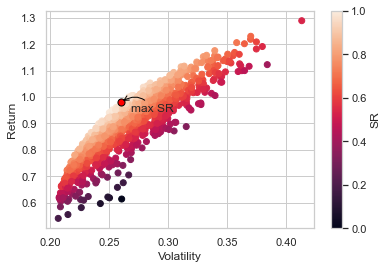

In [9]:
plt.scatter(df_MC.exp_vol, df_MC.exp_ret, c=df_MC.SR)
#get the max
x_max=df_MC[df_MC.SR==max(df_MC.SR)].exp_vol
y_max=df_MC[df_MC.SR==max(df_MC.SR)].exp_ret
sr_max=df_MC[df_MC.SR==max(df_MC.SR)].SR

print("The maximum SR occurs at: exp_vol=%s, exp_ret=%s, SR=%s" %(round(list(x_max)[0],3), 
                                                                  round(list(y_max)[0],3), 
                                                                  round(list(sr_max)[0],3)))

print(list(x_max)[0])

plt.scatter(x_max, y_max, c='red', s=50, edgecolors='black')

#add a notation
plt.annotate('max SR',
                 xy=(x_max, y_max),
                 xytext=(10, -10),  # Offset for the text label
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', 
                    connectionstyle='arc3,rad=0.5',
                    color='black'))

plt.colorbar(label="SR")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.show()

***